In [1]:
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file

# For visvalization
import matplotlib.pyplot as plt

from pandas import DataFrame

import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.ar_model import AR

from matplotlib.font_manager import FontProperties

%matplotlib inline

# 1. Analyze the Overall Condition of Health Life Expectancy

In [2]:
df_h_health = pd.read_csv('../dataset/correlation_clustered_data/HLE_clustered_cleaned_data_WA.csv')
df_h_health = df_h_health.iloc[2:]
df_h_social = pd.read_csv('../dataset/correlation_clustered_data/SS_clustered_cleaned_data_WA.csv')
df_h_social = df_h_social.iloc[2:]

In [3]:
c3_health_countries = df_h_health[df_h_health['Cluster'] == 'C3']['Country name']
c1_social_countries = df_h_social[df_h_social['Cluster'] == 'C1']['Country name']

In [4]:
c_list = list(set(c3_health_countries.values.tolist() + c1_social_countries.values.tolist()))
print(c_list)

['North Cyprus', 'Hong Kong S.A.R. of China', 'Czech Republic', 'Kuwait', 'Taiwan Province of China', 'Luxembourg', 'Belgium', 'Canada', 'Germany', 'Switzerland', 'Greece', 'Lithuania', 'Finland', 'Portugal', 'Slovakia', 'South Korea', 'Austria', 'Italy', 'United Kingdom', 'Australia', 'United Arab Emirates', 'France', 'Sweden', 'Slovenia', 'Cyprus', 'Malta', 'Netherlands', 'Saudi Arabia', 'Denmark', 'New Zealand', 'Norway', 'Spain', 'Estonia', 'Japan', 'Ireland', 'Poland', 'Iceland', 'Singapore', 'United States', 'Bahrain', 'Hungary', 'Israel']


In [5]:
invalid = ['Somalia', 'Maldives', 'Central African Republic', 'Gambia', 
                     'Lesotho', 'North Cyprus', 'Syria', 'Comoros', 'Belize'
                     , 'Cuba', 'Oman', 'Suriname', 'Djibouti', 
                     'Somaliland region', 'Kosovo', 'Palestinian Territories',
                     'Burundi', 'Qatar', 'South Sudan', 'Swaziland', 'Bhutan',
                     'Taiwan Province of China', 'Hong Kong S.A.R. of China',
                     'Angola', 'Namibia', 'Libya', 'Trinidad and Tobago', 
                     'Sudan', 'Jamaica', 'Guyana']

for country in c_list:
    if country in invalid:
        c_list.remove(country)
        print("Removed ", country)

Removed  North Cyprus
Removed  Taiwan Province of China


In [6]:
df_ts = pd.read_csv('../dataset/normalized_filled_clean_data/normalized-filled-clean-world-happiness-report.csv')

In [7]:
columns = list(df_ts.columns)
print(columns)
selected_cols = ['Log GDP per capita','Social support','Healthy life expectancy at birth','Life Ladder','Country name', 'year']
for col in columns:
    if(col not in selected_cols):
        df_ts = df_ts.drop([col], axis=1)

df_ts

['Country name', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth
0,Afghanistan,2006,0.241065,0.139235,0.229885,0.412946
1,Afghanistan,2007,0.241065,0.139235,0.229885,0.412946
2,Afghanistan,2008,0.241065,0.139235,0.229885,0.412946
3,Afghanistan,2009,0.362223,0.173441,0.375000,0.421875
4,Afghanistan,2010,0.425840,0.194970,0.356322,0.430804
...,...,...,...,...,...,...
2251,Zimbabwe,2017,0.225697,0.269215,0.665230,0.506696
2252,Zimbabwe,2018,0.221766,0.275855,0.695402,0.520089
2253,Zimbabwe,2019,0.057005,0.255936,0.672414,0.533482
2254,Zimbabwe,2020,0.140279,0.231590,0.612069,0.546875


In [8]:
df_c3 = df_ts[df_ts['Country name'].isin(c_list)]

In [9]:
#2006 - 2021
init = 2006
years = []
for i in range(16):
    years.append(init)
    init += 1

In [10]:
def get_yrly_avg_dict(df, years, col_item):
    avg_trend = {}
    for year in years:
        mean = df[df['year'] == year][col_item].mean()
        avg_trend[year] = mean
#     print(avg_trend)
    return avg_trend

In [11]:
def plot_by_dict(dis_dict, title, xlabel, ylabel):
    fig = plt.figure()
    fig.suptitle(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=16)
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))
    plt.show()

    
def plot_acf_by_dict(dis_dict, lags):
    avg = []
    for a in dis_dict.values():
        avg.append(a)
    avg = pd.Series(avg)
    plot_acf(avg, lags=lags)
    
def plot_pacf_by_dict(dis_dict, lags):
    avg = []
    for a in dis_dict.values():
        avg.append(a)
    avg = pd.Series(avg)
    plot_pacf(avg, lags=lags)

# Basic Plotting

{2006: 0.8043360160965793, 2007: 0.8058366867873911, 2008: 0.8052221663313214, 2009: 0.7989549798792756, 2010: 0.8012500000000002, 2011: 0.8042064889336015, 2012: 0.8041046277665995, 2013: 0.8054250503018109, 2014: 0.8090769617706236, 2015: 0.8138782696177064, 2016: 0.8174647887323945, 2017: 0.8216901408450706, 2018: 0.8255583501006036, 2019: 0.8277087525150906, 2020: 0.8166876257545275, 2021: 0.8230985915492959}


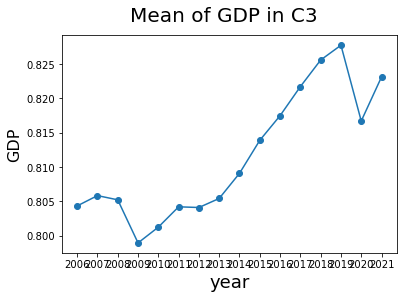

In [12]:
c3_gdp_avg_trend = get_yrly_avg_dict(df_c3, years, col_item = 'Log GDP per capita')
print(c3_gdp_avg_trend)
plot_by_dict(c3_gdp_avg_trend, "Mean of GDP in C3", "year", "GDP")

# Differencing Plot

array([<AxesSubplot:>], dtype=object)

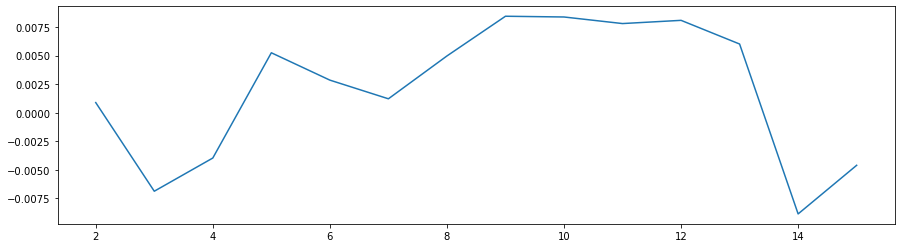

In [13]:
ser = pd.Series(c3_gdp_avg_trend.values())
ser.diff(periods=2).plot(subplots=True, figsize=(15,4))

# ACF, PACF Analysis

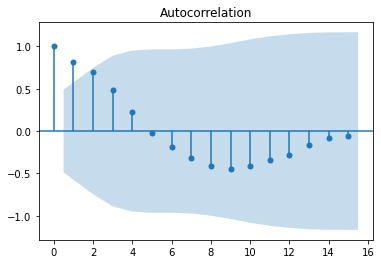

In [14]:
plot_acf_by_dict(c3_gdp_avg_trend, lags=15)

C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


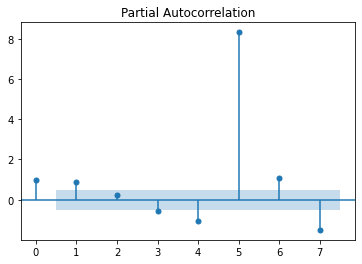

In [15]:
plot_pacf_by_dict(c3_gdp_avg_trend, lags=7)

# ARIMA Model Analysis

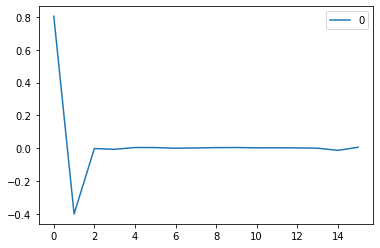

In [16]:
c3_avg = []
for a in c3_gdp_avg_trend.values():
    c3_avg.append(a)
    
c3_model = ARIMA(c3_avg, order=(0,2,1))
c3_model_fit = c3_model.fit()

residuals = DataFrame(c3_model_fit.resid)
residuals.plot()
plt.show()

# ARIMA Model Prediction

In [17]:
X = np.asarray(c3_avg)
X

array([0.80433602, 0.80583669, 0.80522217, 0.79895498, 0.80125   ,
       0.80420649, 0.80410463, 0.80542505, 0.80907696, 0.81387827,
       0.81746479, 0.82169014, 0.82555835, 0.82770875, 0.81668763,
       0.82309859])

predicted=0.825900, expected=0.825558
predicted=0.829439, expected=0.827709
predicted=0.829860, expected=0.816688
predicted=0.799126, expected=0.823099
Test RMSE: 0.014


C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


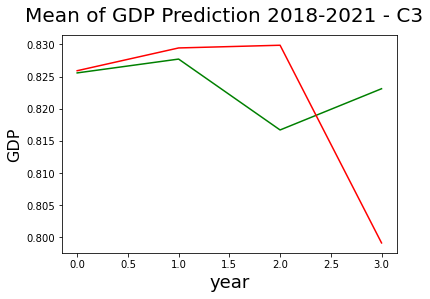

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# split into train and test sets
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
# print(history)
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,2,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
fig = plt.figure()
fig.suptitle('Mean of GDP Prediction 2018-2021 - C3', fontsize=20)
plt.xlabel('year', fontsize=18)
plt.ylabel('GDP', fontsize=16)
plt.plot(test, color='green')
plt.plot(predictions, color='red')
plt.show()

# Verify the Performance of the chosen model

In [19]:
import pmdarima as pm
pm_model = pm.auto_arima(c3_avg, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(pm_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-100.676, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-96.870, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-99.108, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-102.840, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-98.831, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-99.617, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-97.571, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-104.686, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-102.559, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-102.079, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-101.116, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-100.392, Time=0.06 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.388 seconds
                               SARIMAX Results                                
Dep. Variable: